# training a small MLP on a sine wave in $[0, 2\pi)$.

In [13]:
import random
import math
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.nn import Sequential, Linear, MSELoss
from torch.optim import Adam

In [27]:
dataset_size = 1000
xs = [random.random()*2*math.pi for _ in range(dataset_size)]
ys = [math.sin(x) for x in xs]
dataset = list(zip(xs, ys))
dataset = torch.tensor(dataset)

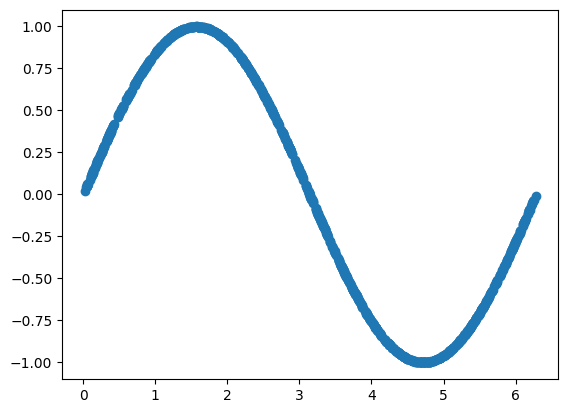

In [28]:
plt.plot(xs, ys, 'o')
plt.show()

In [29]:
num_epochs = 10
losses = []

loss_fn = MSELoss()

model = torch.nn.Sequential(
    torch.nn.Linear(1,4),
    torch.nn.Tanh(),
    torch.nn.Linear(4,16),
    torch.nn.Tanh(),
    torch.nn.Linear(16,64),
    torch.nn.Tanh(),
    torch.nn.Linear(64,64),
    torch.nn.Tanh(),
    torch.nn.Linear(64,16),
    torch.nn.Tanh(),
    torch.nn.Linear(16,4),
    torch.nn.Tanh(),
    torch.nn.Linear(4,1),
)
optim = Adam(model.parameters(), lr=0.0001)
model.train()

Sequential(
  (0): Linear(in_features=1, out_features=4, bias=True)
  (1): Tanh()
  (2): Linear(in_features=4, out_features=16, bias=True)
  (3): Tanh()
  (4): Linear(in_features=16, out_features=64, bias=True)
  (5): Tanh()
  (6): Linear(in_features=64, out_features=64, bias=True)
  (7): Tanh()
  (8): Linear(in_features=64, out_features=16, bias=True)
  (9): Tanh()
  (10): Linear(in_features=16, out_features=4, bias=True)
  (11): Tanh()
  (12): Linear(in_features=4, out_features=1, bias=True)
)

In [32]:
for _ in range(1):
    for data in dataset:
        optim.zero_grad()
        
        x = data.clone().detach()[0]
        y = data.clone().detach()[1]
        
        x.unsqueeze_(dim=0)
        y.unsqueeze_(dim=0)
        
        y_hat = model(x)
        
        loss = loss_fn(y_hat, y)
        
        losses.append(loss.item())
        
        loss.backward()
        
        optim.step()

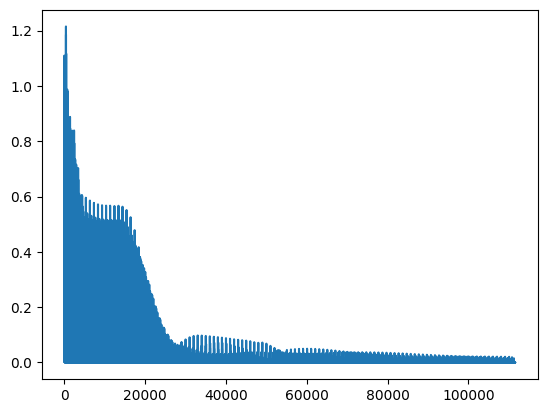

In [33]:
plt.plot(range(len(losses)), losses)
plt.show()

In [34]:
shape_xs = np.arange(0,2*math.pi, 0.01)
shape_ys = [model(torch.tensor(x, dtype=torch.float).unsqueeze_(dim=0)).item() for x in shape_xs]

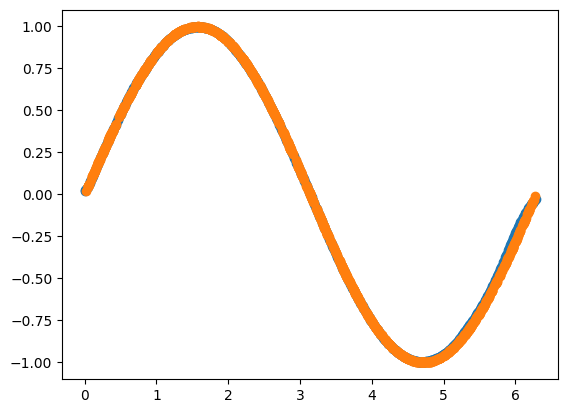

In [35]:
plt.plot(shape_xs, shape_ys, 'o')
plt.plot(xs, ys, 'o')
plt.show()